<div style="text-align:center; font-size:26px; color:green;">Estrategia con ADX y RSI</div>

Si no compartes el conocimiento no sirve para nada. [Michio Kaku](https://www.youtube.com/watch?v=6rDxlolYUQw)



# Lógica y definición de la estrategia.

Esta estrategia utiliza una combinación de dos indicadores técnicos ( **ADX: Average Directional** y **RSI: Relative Strength Index**) para generar señales de entrada  y salida en un mercado financiero. La lógica detrás de la estrategia se puede resumir de la siguiente manera:

* **Cálculo de indicadores técnicos:** Se calculan varios indicadores técnicos como el Índice de Movimiento Direccional Promedio (ADX), el Índice de Fuerza Relativa (RSI), el Plus Directional Indicator (+DI) y el Minus Directional Indicator (-DI) para un conjunto de datos dado.

* **Definición de señales de entrada y salida:** Se establecen condiciones para generar señales de entrada ('Buy') y salida ('Sell'). En este caso, las señales de compra se generan cuando el ADX es mayor que 35, el RSI es menor que 50 y el Plus DI es menor que el Minus DI. Las señales de venta se generan cuando el ADX es mayor que 35, el RSI es mayor que 50 y el Plus DI es mayor que el Minus DI.

* **Registro de señales de entrada y salida:** Las señales de entrada y salida se registran en una columna llamada 'Entry_Exit' en el DataFrame. Esto marca los puntos en el tiempo en los que se deberían realizar operaciones de compra o venta según la estrategia.

* **Identificación de cambios en las señales:** Se detectan los cambios en las señales de 'Buy' a 'Sell' o de 'Sell' a 'Buy' utilizando la función `ne (not equal)` en la columna 'Entry_Exit'.

* **Filtrado de fechas de entrada y salida:** Se filtran las fechas donde ocurren cambios en las señales, lo que indica los momentos específicos en los que se deben realizar las operaciones de compra y venta.

# Bibliotecas Utilizadas

En este proyecto, utilizamos las siguientes bibliotecas de terceros:

- [yfinance](https://github.com/ranaroussi/yfinance): Una biblioteca de Python que proporciona una interfaz para acceder a los datos de Yahoo Finance.
- [Matplotlib](https://matplotlib.org/): Una biblioteca de trazado en 2D de Python que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos a través de interfaces de usuario.
- [Plotly](https://plotly.com/python/): Una biblioteca de gráficos interactivos para Python que ofrece una variedad de opciones de visualización y personalización.
- [Talib](https://github.com/mrjbq7/ta-lib): Una biblioteca de análisis técnico de código abierto (licencia BSD) para Python.


# Estrategia de cruce de EMA's.

 

In [23]:
# Clase para implementar la estrategia con EMA's, todo en una clase.
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
import talib
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

class TechnicalIndicators:
    def __init__(self, ticker, start_date, end_date, short_window, long_window):
        """
        Inicializa la clase TechnicalIndicators con los parámetros especificados.

        :param ticker: str, símbolo del activo financiero
        :param start_date: str, fecha de inicio de los datos históricos
        :param end_date: str, fecha de fin de los datos históricos
        :param short_window: int, período de la ventana corta
        :param long_window: int, período de la ventana larga
        """
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.short_window = short_window
        self.long_window = long_window
        self.df_all_quotes = pd.DataFrame()  # DataFrame para los precios de cierre
        self.close_df = pd.DataFrame()  # DataFrame para los precios de cierre y los indicadores

    def get_quotes(self):
        yfObj = yf.Ticker(self.ticker)
        self.value_name = self.ticker
        self.df_all_quotes = yf.download(self.ticker, start=self.start_date, end=self.end_date, progress=False)

        # Convertir el índice a un objeto DatetimeIndex
        self.df_all_quotes.index = pd.to_datetime(self.df_all_quotes.index)

        # Obtener solo los precios de cierre
        self.close_df = self.df_all_quotes[['Close']].copy()

        return self.df_all_quotes, self.close_df
        
    def exponential_moving_average(self, n):
        """Calcula el promedio móvil exponencial para los datos dados.

        :param n: int, número de períodos para calcular el promedio móvil
        :return: pandas.DataFrame
        """
        ema_label = 'EMA_' + str(n)
        ema_values = self.close_df.ewm(span=n, min_periods=n).mean()
        return ema_values.rename(columns={'Close': ema_label})
  
    def calculate_relative_strength_index_0(self, n):
        """Calcula el índice de fuerza relativa (RSI) para los datos dados.
    
        :param n: int, número de períodos para calcular el RSI
        :return: pandas.DataFrame
        """
        df = self.df_all_quotes.copy(deep=True)
    
        # Calcular los indicadores técnicos
        df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
        df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
        df['PLUS_DI'] = talib.PLUS_DI(df['High'], df['Low'], df['Close'], timeperiod=14)
        df['MINUS_DI'] = talib.MINUS_DI(df['High'], df['Low'], df['Close'], timeperiod=14)
    
        # Estrategia de señales de compra y venta basada en condiciones de ADX y RSI
        df['Signal'] = ''
        df.loc[(df['ADX'] > 35) & (df['RSI'] < 50) & (df['PLUS_DI'] < df['MINUS_DI']), 'Signal'] = 'Buy'
        df.loc[(df['ADX'] > 35) & (df['RSI'] > 50) & (df['PLUS_DI'] > df['MINUS_DI']), 'Signal'] = 'Sell'
    
        # Filtrar el DataFrame por las señales de compra y venta y devolver el resultado
        return df[(df['Signal'] == 'Buy') | (df['Signal'] == 'Sell')]

    def calculate_relative_strength_index(self, n):
        """Calcula el índice de fuerza relativa (RSI) para los datos dados.
        
        :param n: int, número de períodos para calcular el RSI
        :return: pandas.DataFrame
        """
        df = df_all_quotes.copy(deep=True)
        df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
        df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
        df['PLUS_DI'] = talib.PLUS_DI(df['High'], df['Low'], df['Close'], timeperiod=14)
        df['MINUS_DI'] = talib.MINUS_DI(df['High'], df['Low'], df['Close'], timeperiod=14)
        # Estrategia
        df['Entry_Exit'] = ''
        df.loc[(df['ADX'] > 35) & (df['RSI'] < 50) & (df['PLUS_DI'] < df['MINUS_DI']), 'Entry_Exit'] = 'Buy'
        df.loc[(df['ADX'] > 35) & (df['RSI'] > 50) & (df['PLUS_DI'] > df['MINUS_DI']), 'Entry_Exit'] = 'Sell'
        self.RSI_index_df = df[(df['Entry_Exit'] == 'Buy') | (df['Entry_Exit'] == 'Sell')]

        # Detectar cambios de valor en la columna 'Signal'
        signal_changes = self.RSI_index_df['Entry_Exit'].ne(self.RSI_index_df['Entry_Exit'].shift())

        # Filtrar las filas donde ocurren cambios de 'Buy' a 'Sell' o de 'Sell' a 'Buy'
        self.adx_rsi_entry_exit_dates  = self.RSI_index_df[signal_changes]
        
        return self.RSI_index_df, self.adx_rsi_entry_exit_dates 

    def calculate_invest_evolution(self):
        self.invest_evolution = self.adx_rsi_entry_exit_dates .copy(deep=True)
        if len(self.invest_evolution ) == 0:
            return self.invest_evolution   # Retornar el DataFrame vacío si no hay datos

        first_row = self.invest_evolution .iloc[0]
        self.invest_evolution ['Buy&Hold'] = 100.00 * (self.invest_evolution ['Close'] / first_row['Close'])
        cash = 100.00
        shares = 0
        for i, row in self.invest_evolution .iterrows():
            if row['Entry_Exit'] == 'Buy':  # Compra
                shares = cash / row['Close']
                cash = 0
            elif row['Entry_Exit'] == 'Sell':  # Venta
                cash = shares * row['Close']
                shares = 0
            self.invest_evolution .loc[i, 'Buy&Sell'] = cash + shares * row['Close']

        return self.invest_evolution 
    
    def plot_indicators_and_entry_exit_points(self):
        # Crear subplots
        fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
        
        # Graficar Close
        axes[0].plot(self.close_df.index, self.close_df['Close'], label='Close', color='black',  alpha=0.3, lw=1.5)
        axes[0].set_ylabel('Close')
        
        # Graficar ADX
        axes[1].plot(self.RSI_index_df.index, self.RSI_index_df['ADX'], label='ADX', color='green', lw=1.5)
        axes[1].set_ylabel('ADX')
        
        # Puntos de entrada y salida en Close
        entry_points = self.invest_evolution[self.invest_evolution['Entry_Exit'] == 'Buy']
        axes[0].scatter(entry_points.index, entry_points['Close'], marker='^', color='green', label='Buy Signal', s=100)
        
        exit_points = self.invest_evolution[self.invest_evolution['Entry_Exit'] == 'Sell']
        axes[0].scatter(exit_points.index, exit_points['Close'], marker='v', color='red', label='Sell Signal', s=100)
        
        # Graficar RSI
        axes[2].plot(self.RSI_index_df.index, self.RSI_index_df['RSI'], label='RSI', color='blue')
        axes[2].set_ylabel('RSI')
        
        # Ajustes finales
        axes[0].legend()
        axes[1].legend()
        axes[2].legend()
        plt.xlabel('Date')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [26]:
# Crear una instancia de la clase TechnicalIndicators
ticker = '^IBEX'  # Símbolo del activo financiero (Apple en este caso)
start_date = '2010-01-01'  # Fecha de inicio de los datos históricos
end_date = '2024-3-15'  # Fecha de fin de los datos históricos
short_window = 30  # Período de la ventana corta para EMA(30)
long_window = 50  # Período de la ventana larga para EMA (50)
tech_indicators = TechnicalIndicators(ticker, start_date, end_date, short_window, long_window)

# Obtener los precios de cierre y calcular los indicadores técnicos
df_all_quotes, df_close_quotes= tech_indicators.get_quotes()

RSI_index_df, adx_rsi_entry_exit_dates = tech_indicators.calculate_relative_strength_index(14) 

# Imprimir el DataFrame final
invest_evolution = tech_indicators.calculate_invest_evolution()

invest_evolution

,Open,High,Low,Close,Adj Close,Volume,ADX,RSI,PLUS_DI,MINUS_DI,Entry_Exit,Buy&Hold,Buy&Sell
Date,,,,,,,,,,,,,
2010-02-10,10383.099609,10543.099609,10358.900391,10455.000000,10454.989258,306800,60.652999,31.372286,12.622212,35.419289,Buy,100.000000,100.000000
2010-03-04,10595.599609,10814.599609,10577.099609,10745.299805,10745.289062,231200,38.311765,51.818459,22.483686,22.373060,Sell,102.776660,102.776660
2012-04-13,7468.700195,7485.500000,7218.399902,7250.600098,7250.592773,345668000,36.525060,24.108277,8.146685,37.007338,Buy,69.350551,102.776660
2012-06-13,6529.299805,6639.000000,6490.700195,6615.299805,6615.292969,214979800,39.087529,51.601543,23.899780,21.979844,Sell,63.274030,93.771331
2013-02-07,8081.500000,8160.100098,8005.600098,8014.600098,8014.591797,267892800,35.365349,34.534687,13.978812,33.760184,Buy,76.658059,93.771331
2013-10-11,9707.299805,9707.299805,9624.400391,9668.500000,9668.490234,204909400,35.346170,75.379759,36.835577,10.200584,Sell,92.477284,113.122065
2015-09-01,10136.099609,10148.500000,9921.099609,9992.799805,9992.790039,286174100,35.901529,34.987552,12.274947,43.152502,Buy,95.579147,113.122065
2015-10-07,10176.099609,10289.799805,10119.900391,10170.000000,10169.989258,369632100,35.368684,58.130868,28.581732,27.644834,Sell,97.274032,115.128034
2016-01-11,8849.900391,9022.000000,8835.099609,8886.099609,8886.090820,301412900,36.170005,27.324165,11.772385,40.551778,Buy,84.993779,115.128034


# Gráfica con los puntos de compra y venta recomendados

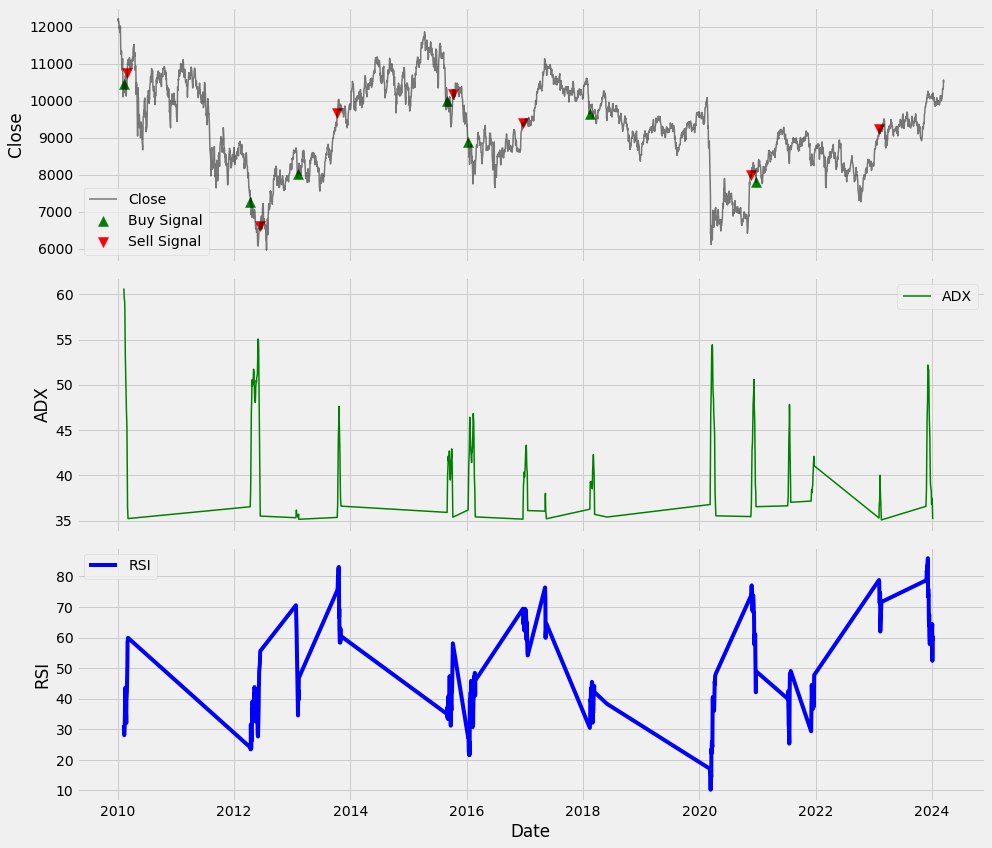

In [22]:
tech_indicators.plot_indicators_and_entry_exit_points()

# Nota de advertencias.
Este notebook tiene fines educativos y de demostración solamente. Las estrategias de inversión presentadas aquí son ejemplos y pueden contener errores. Se recomienda encarecidamente que cualquier decisión de inversión se tome después de consultar con un asesor financiero calificado. No se proporciona asesoramiento financiero, y cualquier uso de la información presentada es bajo su propio riesgo. Agradecemos cualquier retroalimentación para mejorar la calidad de estos ejemplos.  
Es importante recordar que no hay una estrategia única que funcione en todos los casos, y siempre hay un riesgo asociado con la inversión. Es recomendable realizar pruebas exhaustivas y análisis antes de implementar cualquier estrategia en un entorno de trading real.